In [1]:
import sys
sys.path.append('../src')

In [2]:
import glob
import ete3
import pandas as pd
import os
import time
import json
import AFDB_tools, treescore , foldseek2tree , corecut
import colour
import numpy as np
import toytree
from matplotlib import pyplot as plt
from Bio import SeqIO
import toytree
import toyplot.svg

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
outfolder = '../examples/rrnpp_final/'

In [5]:
try:
    os.mkdir(outfolder +'structs/')
except:
    print('already exists')

#load the identifiers
with open(outfolder + 'identifiers.txt') as handle:
    identifiers = [ l.strip() for l in handle ]
notfound = [ AFDB_tools.grab_struct(uniID, outfolder+'structs/')  for uniID in identifiers ]
notfound = [ i for i in notfound if i]
with open(outfolder+'unmapped.txt', 'w') as simout:
    simout.write(json.dumps(notfound))


already exists
structure not found A0A8G1J9J6
structure not found A0A8U0I9E3
structure not found A0A8U0I987
structure not found A0A8U0I6F7
structure not found A0A8G0WHY4
structure not found A0A8G0S8P0
structure not found A0A8G0SBZ7
structure not found A0A8G0WGX4
structure not found A0A8G0SBI0
structure not found A0A8F9SS43
structure not found A0A8F8XXK4
structure not found A0A8F6CXY3
structure not found A0A8F6CY61
structure not found A0A8F6D7F8
structure not found A0A8F9U323
structure not found A0A8T9FLT2
structure not found A0A8T9FAW3
structure not found A0A1P8CWN8
structure not found A0A892RRK1
structure not found A0A8T9FD52
structure not found A0A8U0BHM5
structure not found A0A8G1DJH3
structure not found A0A8G1BB92
structure not found A0A8T8D6L7
structure not found A0A8T9FAS1
structure not found A0A8T9T5Z7
structure not found A0A8T9RR54
structure not found A0A1B0T6A5
structure not found H0UST6
structure not found A0A068ENZ6
structure not found A0A1B1P786
structure not found A0A4P8N4

In [6]:
t, alnres = foldseek2tree.structblob2tree(outfolder + 'structs/',outfolder )

found foldseek output, skipping foldseek
             query      target  fident  alnlen  mismatch  gapopen  qstart  \
0       A0A6M8D843  A0A6M8D843   1.000     383         0        0       1   
1       A0A6M8D843  A0A0K0QCL2   0.906     383        36        0       1   
2       A0A6M8D843      B7IY66   0.932     383        26        0       1   
3       A0A6M8D843      K0FM26   0.788     383        81        0       1   
4       A0A6M8D843  A0A5C1FEK2   0.785     383        82        0       1   
...            ...         ...     ...     ...       ...      ...     ...   
589679  A0A3Q9HPK8  A0A7H8V064   0.108     250       167       12       1   
589680  A0A3Q9HPK8  A0A0X8GYF8   0.112     257       180       11      59   
589681  A0A3Q9HPK8  A0A0Z8EDW7   0.108     250       167       11       1   
589682  A0A3Q9HPK8  A0A2X3SEZ5   0.115     268       172       13      28   
589683  A0A3Q9HPK8      K8E6J0   0.097     287       198       13      30   

        qend  tstart  tend        

In [10]:
#cut the structures down to their cores
import corecut
core = corecut.extract_core(outfolder + 'res.m8' , outfile = outfolder+'core.csv',  hitthresh = .95 ,minthresh = .8, corefolder = 'core_structs/' , structfolder = 'structs/' )

../examples/rrnpp_final/
extracting core
hitthresh: 0.95
minthresh: 0.8
            query          target  fident  alnlen  mismatch  gapopen  qstart  \
0  A0A6M8D843.pdb  A0A6M8D843.pdb   1.000     383         0        0       1   
1  A0A6M8D843.pdb  A0A0K0QCL2.pdb   0.906     383        36        0       1   
2  A0A6M8D843.pdb      B7IY66.pdb   0.932     383        26        0       1   
3  A0A6M8D843.pdb      K0FM26.pdb   0.788     383        81        0       1   
4  A0A6M8D843.pdb  A0A5C1FEK2.pdb   0.785     383        82        0       1   

   qend  tstart  tend        evalue  bits    lddt  \
0   383       1   383  1.036000e-48  2815  1.0000   
1   383       1   383  2.636000e-45  2600  0.9858   
2   383       1   383  5.259000e-45  2570  0.9803   
3   383       1   383  2.119000e-40  2307  0.9756   
4   383       1   383  1.301000e-40  2277  0.9474   

                                            lddtfull  alntmscore  
0  1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00...      1.0

processed: 768: 100%|██████████| 768/768 [00:39<00:00, 19.39it/s]


core_structs/ folder already present
cter_structs/ folder already present
nter_structs/ folder already present


processed: 768: 100%|██████████| 768/768 [00:43<00:00, 17.80it/s]


In [11]:
print(core)

../examples/rrnpp_final/struct_cores.csv


In [12]:
#make a directory for the core results
#this will also make a directory for the ctre and nter stuff outside the core

ovr = True
import foldseek2tree
try:
    os.mkdir(outfolder +'core_res/')
except:
    print('already exists')
t, alnres = foldseek2tree.structblob2tree(outfolder + 'core_structs/',outfolder + 'core_res/' , overwrite = ovr )

already exists
../examples/rrnpp_final/core_res/res.m8 exists and will be overwritten
easy-search ../examples/rrnpp_final/core_structs/ ../examples/rrnpp_final/core_structs/ ../examples/rrnpp_final/core_res/res.m8 tmp --format-output query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bits,lddt,lddtfull,alntmscore --exhaustive-search 

MMseqs Version:              	30fdcac78217579fa25d59bc271bd4f3767d3ebb
Seq. id. threshold           	0
Coverage threshold           	0
Coverage mode                	0
Max reject                   	2147483647
Max accept                   	2147483647
Add backtrace                	false
TMscore threshold            	0
TMalign hit order            	0
TMalign fast                 	1
Preload mode                 	0
Threads                      	48
Verbosity                    	3
LDDT threshold               	0
Sort by structure bit score  	1
Substitution matrix          	aa:3di.out,nucl:3di.out
Alignment mode               	3
Alignment m

In [15]:
#load the results
import pandas as pd
import numpy as np
import networkx as nx
import foldseek2tree
import os

if not os.path.exists(outfolder + 'nter_allvall.m8') or ovr == True:
#do a foldseek all v all on the nter and cter structures
    nterm8 = foldseek2tree.runFoldseek_allvall_EZsearch(outfolder + 'nter_structs/', outfolder + 'nter_allvall.m8' , foldseekpath = '../foldseek/foldseek' )
if not os.path.exists(outfolder + 'cter_allvall.m8') or ovr == True:
    cterm8 = foldseek2tree.runFoldseek_allvall_EZsearch(outfolder + 'cter_structs/', outfolder + 'cter_allvall.m8' , foldseekpath = '../foldseek/foldseek' )


../examples/rrnpp_final/nter_allvall.m8 exists and will be overwritten
easy-search ../examples/rrnpp_final/nter_structs/ ../examples/rrnpp_final/nter_structs/ ../examples/rrnpp_final/nter_allvall.m8 tmp --format-output query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bits,lddt,lddtfull,alntmscore --exhaustive-search 

MMseqs Version:              	30fdcac78217579fa25d59bc271bd4f3767d3ebb
Seq. id. threshold           	0
Coverage threshold           	0
Coverage mode                	0
Max reject                   	2147483647
Max accept                   	2147483647
Add backtrace                	false
TMscore threshold            	0
TMalign hit order            	0
TMalign fast                 	1
Preload mode                 	0
Threads                      	48
Verbosity                    	3
LDDT threshold               	0
Sort by structure bit score  	1
Substitution matrix          	aa:3di.out,nucl:3di.out
Alignment mode               	3
Alignment mode            

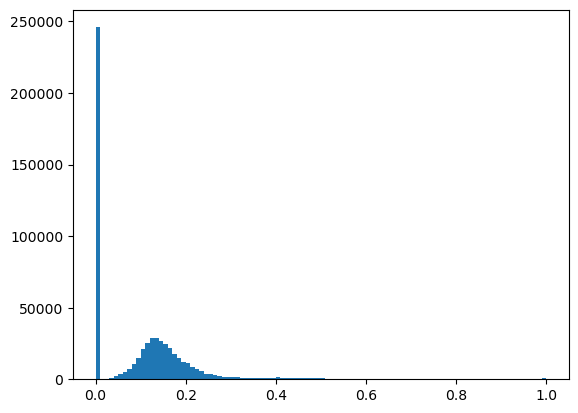

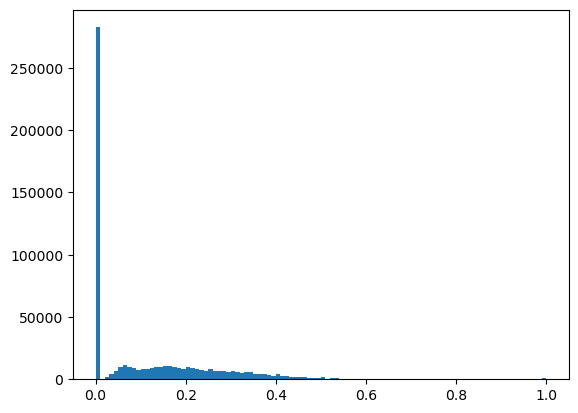

In [16]:

from matplotlib import pyplot as plt
#load the results
nter = pd.read_table(outfolder + 'nter_allvall.m8' , header = None )
cter = pd.read_table(outfolder + 'cter_allvall.m8' , header = None )

# make a distmat using the foldseek results
def res2distmat(ter):
    ter.columns = 'query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bits,lddt,lddtfull,alntmscore'.split(',')
    termat = np.zeros( (len(ter['query'].unique()), len(ter['query'].unique())) )
    ids = { j: i for i,j in enumerate(ter['query'].unique())}
    for idx,row in ter.iterrows():
        termat[ids[row['query']] , ids[row['target']]] += row['fident']
        termat[ids[row['target']] , ids[row['query']]] += row['fident']
    termat /= 2
    return termat , ids
ctermat, cterids = res2distmat(cter)
ntermat, nterids = res2distmat(nter)

plt.hist( ctermat.flatten() , bins = 100)
plt.show()
plt.hist( ntermat.flatten() , bins = 100)
plt.show()


In [17]:
np.save( outfolder + 'cter_distmat.npy' , ctermat)
np.save( outfolder + 'nter_distmat.npy' , ntermat)
import json
with open(outfolder + 'cter_mapping.json', 'w') as handle:
    handle.write(json.dumps(cterids))
with open(outfolder + 'nter_mapping.json', 'w') as handle:
    handle.write(json.dumps(nterids))
    

In [18]:
#thresh the matrices between .4 and .99
ctermat[ctermat < .25] = 0
ntermat[ntermat < .25] = 0


ctermat[ctermat ==1] = 0
ntermat[ntermat ==1] = 0


centrality c


100%|██████████| 38/38 [00:00<00:00, 323293.21it/s]


centralityy n


100%|██████████| 6/6 [00:00<00:00, 53092.46it/s]

centers N: [513, 308, 452, 326, 76, 515]
centers C: [546, 151, 82, 527, 132, 140, 203, 224, 351, 254, 257, 272, 293, 324, 328, 339, 386, 405, 417, 205, 430, 529, 582, 597, 528, 634, 635, 647, 674, 374, 682, 154, 712, 713, 171, 148, 746, 757]
nter components: 6
cter components: 38
[142, 133, 73, 19, 15, 41, 9, 148, 2, 126, 31, 3]


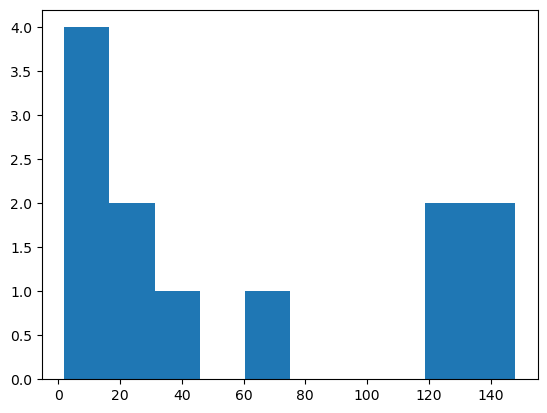

[41, 267, 121, 317, 21]


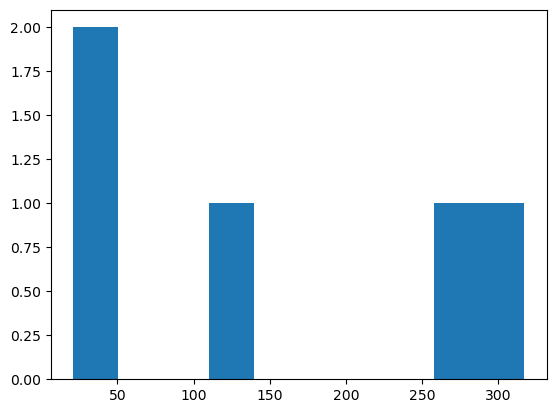

In [20]:
import networkx as nx
import tqdm
#make a networkx graph
cterG = nx.from_numpy_array(ctermat)
nterG = nx.from_numpy_array(ntermat)
Ccommunities = nx.community.louvain_communities(cterG)
Ncommunities = nx.community.louvain_communities(nterG)

#find the center of each community with the closeness centrality
#use the max of ech dict as the center 

Csubgraphs = [ cterG.subgraph(c) for c in Ccommunities]
Nsubgraphs = [ nterG.subgraph(c) for c in Ncommunities]


print('centrality c')
centers_C = [ nx.closeness_centrality(C) for C in tqdm.tqdm(Csubgraphs) ] 
centers_C = [ max(d, key=lambda k: d[k])  for d in tqdm.tqdm(centers_C)]
print('centralityy n')
centers_N = [ nx.closeness_centrality(C) for C in tqdm.tqdm(Nsubgraphs) ] 
centers_N = [ max(d, key=lambda k: d[k])  for d in tqdm.tqdm(centers_N)]


print('centers N:', centers_N)
print('centers C:', centers_C)

#print the number of connected components
print('nter components: ' + str(len(Ncommunities)))
print('cter components: ' + str(len(Ccommunities)))

print([ len(i) for i in Ccommunities if len(i)> 1] )
plt.hist( [ len(i) for i in Ccommunities if len(i)> 1 ] , bins = 10)
plt.show()

print([ len(i) for i in Ncommunities if len(i)> 1] )
plt.hist( [ len(i) for i in Ncommunities if len(i)> 1  ] , bins = 10)
plt.show()

#add a community attribute to each node in the graph
for i in range(len(Ccommunities)):
    if len(Ccommunities[i]) < 10:
        for j in Ccommunities[i]:
            cterG.nodes[j]['community'] = -1
    else:
        for j in Ccommunities[i]:
            cterG.nodes[j]['community'] = i 
for i in range(len(Ncommunities)):  
    if len(Ncommunities[i]) < 10:
        for j in Ncommunities[i]:
            nterG.nodes[j]['community'] = -1
    else:
        for j in Ncommunities[i]:
            nterG.nodes[j]['community'] = i 


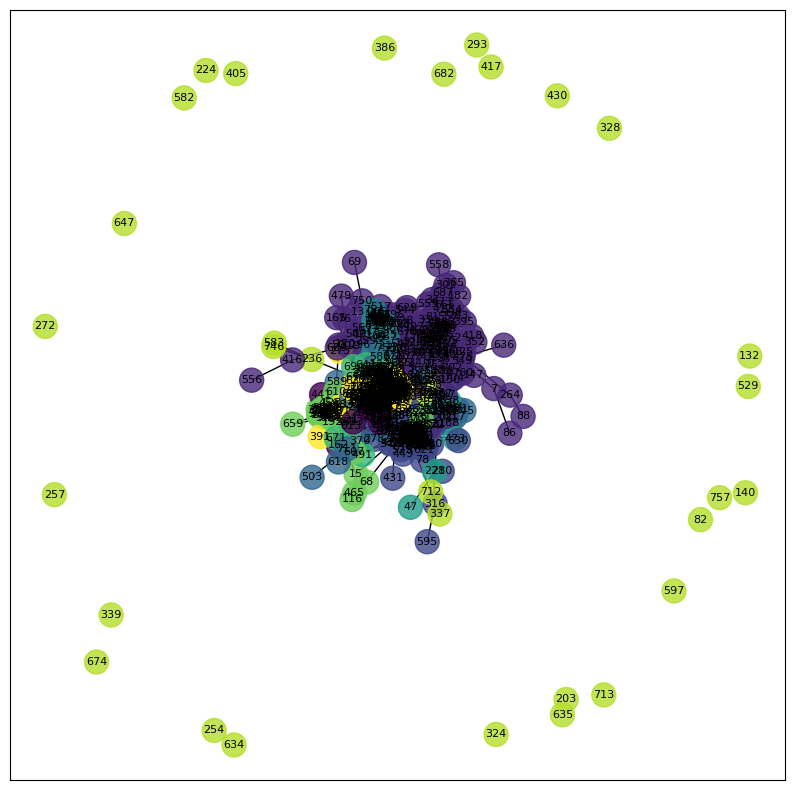

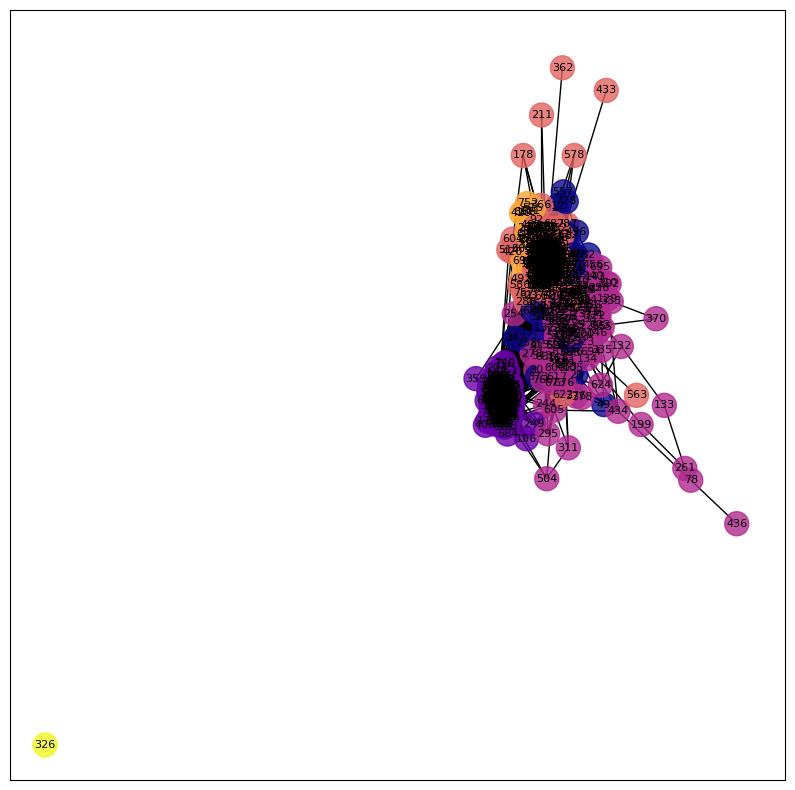

In [21]:
#plot networkx graphs with communities as different colors
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


def plot_communities(G, node_size=100, node_color='blue', edge_color='gray', edge_alpha=0.5, node_alpha=0.8, with_labels=True , cmap = None):
    """
    Plots the graph G with the communities as different colors.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    pos = nx.spring_layout(G)

    # set the colors of each node. The communities are the keys in the dictionary
    # and the value is a list with all the nodes that belong to that community
    
    communities = set(nx.get_node_attributes(G, 'community').values())
    colors = [cmap(i) for i in np.linspace(0, 1, len(communities))]
    colors = {c: colors[i] for i, c in enumerate(communities)}
    # assign a color to each node based on the community it belongs to
    node_colors = [colors[G.nodes[node]['community']] for node in G.nodes()]
    # draw the graph nodes
    nx.draw_networkx_nodes(G, pos, ax=ax, alpha=node_alpha, node_color=node_colors)
    # draw the graph edges
    nx.draw_networkx_edges(G, pos, ax=ax, width=1.0)
    # draw the node labels
    if with_labels:
        nx.draw_networkx_labels(G, pos, ax=ax, font_size=8)
    plt.show()
    return ax , colors

# plot the graph with the communities
cmap = plt.get_cmap('viridis')
ax, colors_cter = plot_communities(cterG, Ccommunities, nx.spring_layout(cterG) , cmap = cmap)

#select new cmap
cmap = plt.get_cmap('plasma')
ax , colors_nter = plot_communities(nterG, Ncommunities, nx.spring_layout(nterG) , cmap = cmap)


In [22]:
#output the community of each structure to the dataframe
def add_communities(mapping, terG , centers , prefix = None):
    print(centers)
    rev_ids = dict(zip(mapping.values(), mapping.keys()) )
    if prefix is not None:
        label = 'community_' + prefix
        center_label = 'center_'+ prefix
    else:
        label = 'community'
        center_label = 'center'


    community_dict = { rev_ids[i]: { label: terG.nodes[i]['community'] , center_label : i in centers } for i in terG.nodes()}
    community_df = pd.DataFrame.from_dict(community_dict, orient = 'index')
    return community_df

cter_assignment = add_communities(cterids, cterG, centers_C, prefix = 'cter')
nter_assignment = add_communities(nterids, nterG , centers_N,  prefix = 'nter')

nter_assignment['color_nter'] = nter_assignment['community_nter'].apply(lambda x: colors_nter[x])
cter_assignment['color_cter'] = cter_assignment['community_cter'].apply(lambda x: colors_cter[x])


ter_assignment = nter_assignment.merge(cter_assignment, right_index = True, left_index = True, how = 'left' )
print(ter_assignment[ter_assignment.center_nter == True])
print(ter_assignment[ter_assignment.center_cter == True])


[546, 151, 82, 527, 132, 140, 203, 224, 351, 254, 257, 272, 293, 324, 328, 339, 386, 405, 417, 205, 430, 529, 582, 597, 528, 634, 635, 647, 674, 374, 682, 154, 712, 713, 171, 148, 746, 757]
[513, 308, 452, 326, 76, 515]
                community_nter  center_nter  \
A0A0B4RF84.pdb               4         True   
A0A0M5JM41.pdb               1         True   
A0A514LKS8.pdb              -1         True   
C3DQ44.pdb                   2         True   
G7SEP2.pdb                   0         True   
G7VZH1.pdb                   5         True   

                                         color_nter  community_cter  \
A0A0B4RF84.pdb  (0.881443, 0.392529, 0.383229, 1.0)               1   
A0A0M5JM41.pdb   (0.417642, 0.000564, 0.65839, 1.0)              31   
A0A514LKS8.pdb  (0.940015, 0.975158, 0.131326, 1.0)               1   
C3DQ44.pdb       (0.69284, 0.165141, 0.564522, 1.0)              34   
G7SEP2.pdb      (0.050383, 0.029803, 0.527975, 1.0)               1   
G7VZH1.pdb       (0.9882

In [25]:
ter_assignment.to_csv(outfolder + 'ter_assignment.csv')

In [26]:
print(nter_assignment['community_nter'].value_counts())
print(ter_assignment.head() )

 4    317
 1    267
 2    121
 0     41
 5     21
-1      1
Name: community_nter, dtype: int64
                community_nter  center_nter  \
A0A3R5UAV6.pdb               4        False   
A0A6I6UPL9.pdb               4        False   
A0A7U6HAZ2.pdb               2        False   
A9VI48.pdb                   1        False   
B7IY66.pdb                   2        False   

                                         color_nter  community_cter  \
A0A3R5UAV6.pdb  (0.881443, 0.392529, 0.383229, 1.0)               3   
A0A6I6UPL9.pdb  (0.881443, 0.392529, 0.383229, 1.0)               3   
A0A7U6HAZ2.pdb   (0.69284, 0.165141, 0.564522, 1.0)              34   
A9VI48.pdb       (0.417642, 0.000564, 0.65839, 1.0)               0   
B7IY66.pdb       (0.69284, 0.165141, 0.564522, 1.0)              34   

                center_cter                           color_cter  
A0A3R5UAV6.pdb        False  (0.190631, 0.407061, 0.556089, 1.0)  
A0A6I6UPL9.pdb        False  (0.190631, 0.407061, 0.556089, 1

In [ ]:
#load a representative of each community
import nglview
import time

def save_image(view,nstruct,path):
    print(img)
    #hide all structurs not equal to nstruct
    view.clear_representations()
    

    view.add_cartoon(selection="protein", color=df[df['community_'+ter] == cter]['color_'+ter].values[0])
    view.add_ball_and_stick(selection="not protein", color='grey')
    img = view.render_image()    

    #save the image to a file
    with open(path+'.png', 'wb') as f:
        f.write(img)


views = {}
for ter,data in { 'nter': ( 'nter_structs/' ,nter_assignment), 'cter': ( 'cter_structs/' ,cter_assignment) }.items():
    folder ,df = data
    for i,cter in enumerate(df['community_'+ter].unique()):
        print(cter)

        if cter == -1:
            continue        
        #load the structure
        else:
            struct = df[df['community_'+ter] == cter].index.values
            color = df[df['community_'+ter] == cter]['color_'+ter].iloc[0]

            structfile = outfolder + folder + struct[0]
            print(structfile , len(struct))
            #visualize each struc with nglview with the community color
            #with open(structfile, 'r') as f:
            if i == 0:
                view = nglview.show_file(structfile)
            else:
                view.add_component(structfile)
    views[ter] = view
    print(  view.n_components ,view._ngl_component_ids)

In [ ]:
print(views)

#chage the color of the cartoon representation
for ter,view in views.items():
    print(ter)
    for i,cter in enumerate(ter_assignment['community_'+ter].unique()):
        print(cter)
        if cter == -1:
            continue
        else:
            view.clear_representations()
            try:
                view.add_cartoon(selection="protein", color=ter_assignment[ter_assignment['community_'+ter] == cter]['color_'+ter].values[0])
                view.add_ball_and_stick(selection="not protein", color='grey')
                view._display_image()
                time.sleep(1)
                view._display_image()
                #show the image in ipython notebook cell
                
            except:
                print('error')

In [ ]:
views['cter']